# Mental Health in Tech

## Libraries

In [1]:
import numpy as np
import pandas as pd
import os, types
import seaborn as sns # for visualization
import matplotlib.pyplot as plt
import matplotlib as mpl

## Dataset

In [2]:
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ec2d60ba0656445ba4ab0c771aa5f2ad = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OnYXv1oKrrdxLp75cRhGXhUvoZYUVS5o_kFbXvxCDIdq',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

body = client_ec2d60ba0656445ba4ab0c771aa5f2ad.get_object(Bucket='mentalhealthintech-donotdelete-pr-mrq9ayhlppvhxd',Key='survey.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mental_data = pd.read_csv(body)
mental_data.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Data Pre-processing

In [3]:
# number of rows and columns
mental_data.shape

(1259, 27)

In [4]:
# getting more info about the dataset
mental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
mental_data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [6]:
# checking for missing values in each column
mental_data.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64

The dataset contains missing values. Particularly the columns: state, self_employed, work_interfere, and comments. 

For the model to be used, columns like "state", "comments", and "Timestamp" will be dropped as they are not necessary.

Column "state" is only used when the entry is from USA.

In [7]:
mental_data.drop(['comments','state','Timestamp'], axis=1, inplace=True)

In [8]:
# check again for null values
mental_data.isnull().sum().sort_values(ascending=False)

work_interfere               264
self_employed                 18
Age                            0
seek_help                      0
mental_vs_physical             0
phys_health_interview          0
mental_health_interview        0
supervisor                     0
coworkers                      0
phys_health_consequence        0
mental_health_consequence      0
leave                          0
anonymity                      0
wellness_program               0
Gender                         0
care_options                   0
benefits                       0
tech_company                   0
remote_work                    0
no_employees                   0
treatment                      0
family_history                 0
Country                        0
obs_consequence                0
dtype: int64

In [9]:
print(mental_data["work_interfere"].unique())
print(mental_data['self_employed'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' nan]
[nan 'Yes' 'No']


According to data description 'work_interfere' ask question 'If you have a mental health condition, do you feel that it interferes with your work?'.

We can assume that people that have left this field empty do not have a diagnosed mental condition. We changed all nan values to 'no answer'.

In [10]:
mental_data['work_interfere'] = mental_data['work_interfere'].fillna("no_answer")
print("\n", mental_data['work_interfere'].unique(), "\n")
print(mental_data.isnull().sum().sort_values(ascending=False))


 ['Often' 'Rarely' 'Never' 'Sometimes' 'no_answer'] 

self_employed                18
Age                           0
seek_help                     0
mental_vs_physical            0
phys_health_interview         0
mental_health_interview       0
supervisor                    0
coworkers                     0
phys_health_consequence       0
mental_health_consequence     0
leave                         0
anonymity                     0
wellness_program              0
Gender                        0
care_options                  0
benefits                      0
tech_company                  0
remote_work                   0
no_employees                  0
work_interfere                0
treatment                     0
family_history                0
Country                       0
obs_consequence               0
dtype: int64


Because there is only 18 data points where we have nan values in column 'self_employed', we can just drop them

In [11]:
mental_data.dropna(inplace=True)

print("\n", mental_data['self_employed'].unique(), "\n")
print(mental_data.isnull().sum().sort_values(ascending=False))


 ['Yes' 'No'] 

Age                          0
Gender                       0
mental_vs_physical           0
phys_health_interview        0
mental_health_interview      0
supervisor                   0
coworkers                    0
phys_health_consequence      0
mental_health_consequence    0
leave                        0
anonymity                    0
seek_help                    0
wellness_program             0
care_options                 0
benefits                     0
tech_company                 0
remote_work                  0
no_employees                 0
work_interfere               0
treatment                    0
family_history               0
self_employed                0
Country                      0
obs_consequence              0
dtype: int64


In [12]:
# to check the uniques values of "Age" column (make sure entries are in "work-age" range)
mental_data['Age'].unique()

array([         46,          36,          29,          31,          41,
                33,          35,          34,          37,          32,
                30,          42,          40,          27,          38,
                50,          24,          18,          28,          26,
                22,          44,          23,          19,          25,
                39,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

Age range of people to be included in workforce must be in between 18 and 100. I chose this range as people can start being part of the workforce as early as after highschool (18) and some people still work even after retiring age.

In [13]:
unclean_age = mental_data[(mental_data['Age'] < 18) | (mental_data['Age'] > 100)]
print(len(unclean_age))
print(unclean_age['Age'].index)

8
Int64Index([143, 364, 390, 715, 734, 989, 1090, 1127], dtype='int64')


In [14]:
mental_data = mental_data.drop(unclean_age['Age'].index)

In [15]:
mental_data['Age'].unique()

array([46, 36, 29, 31, 41, 33, 35, 34, 37, 32, 30, 42, 40, 27, 38, 50, 24,
       18, 28, 26, 22, 44, 23, 19, 25, 39, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

### Categorising Genders


In [16]:
mental_data['Gender'].unique()

array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [17]:
# need to categorise the different genders into three main labels: male, female, and trans

male = ['male', 'Male','M', 'm', 'Male-ish', 'maile','Cis Male','Mal', 'Male (CIS)','Make','Male ', 'Man',
        'msle','cis male', 'Cis Man','Malr','Mail']
female = ['Female', 'female','Cis Female', 'F','f','Femake', 'woman','Female ','cis-female/femme','Female (cis)','femail','Woman','female']
trans = ['Trans-female','something kinda male?','queer/she/they','non-binary','All','fluid', 'Genderqueer','Androgyne', 'Agender','Guy (-ish) ^_^',
        'male leaning androgynous','Trans woman','Neuter', 'Female (trans)','queer','ostensibly male, unsure what that really means','trans']

In [18]:
# replace values

mental_data['Gender'].replace(to_replace=male, value='male', inplace=True)
mental_data['Gender'].replace(to_replace=female, value='female', inplace=True)
mental_data['Gender'].replace(to_replace=trans, value='trans', inplace=True)

In [19]:
# print unique values of Gender column
print(mental_data['Gender'].unique())

['male' 'female' 'trans' 'Nah' 'Enby']


In [22]:
mental_data.drop(mental_data[mental_data['Gender'] == 'Nah'].index, inplace=True)
mental_data.drop(mental_data[mental_data['Gender'] == 'Enby'].index, inplace=True)

print(mental_data['Gender'].unique())

['male' 'female' 'trans']


### Categorising Country Regions

In [24]:
mental_data['Country'].unique()

array(['United States', 'France', 'United Kingdom', 'Canada', 'Portugal',
       'Netherlands', 'Switzerland', 'Poland', 'Australia', 'Germany',
       'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica', 'Austria',
       'Ireland', 'India', 'South Africa', 'Italy', 'Bulgaria', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [25]:
# categorising based on continent each country belongs

north_america = ['United States','Canada','Mexico','Costa Rica','Bahamas, The']
south_america = ['Brazil','Colombia','Uruguay']
europe = ['France','United Kingdom','Portugal','Netherlands', 'Switzerland', 'Poland','Germany',
         'Russia','Slovenia','Austria','Ireland','Italy', 'Bulgaria', 'Sweden','Latvia', 'Romania',
         'Belgium','Spain', 'Finland','Bosnia and Herzegovina', 'Hungary','Croatia', 'Norway','Denmark',
         'Greece', 'Moldova','Czech Republic']
asia = ['Georgia','Singapore', 'Japan','Thailand','China','Philippines','India','Israel']
africa = ['Zimbabwe','Nigeria','South Africa']
oceania = ['Australia','New Zealand']

In [26]:
# replace values

mental_data['Country'].replace(to_replace=north_america, value='NA',inplace=True)
mental_data['Country'].replace(to_replace=south_america, value='SA',inplace=True)
mental_data['Country'].replace(to_replace=europe, value='EU',inplace=True)
mental_data['Country'].replace(to_replace=asia, value='AS',inplace=True)
mental_data['Country'].replace(to_replace=africa, value='AF',inplace=True)
mental_data['Country'].replace(to_replace=oceania, value='OC',inplace=True)

mental_data['Country'].unique()

array(['NA', 'EU', 'OC', 'SA', 'AS', 'AF'], dtype=object)

In [28]:
mental_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 18 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1231 non-null   int64 
 1   Gender                     1231 non-null   object
 2   Country                    1231 non-null   object
 3   self_employed              1231 non-null   object
 4   family_history             1231 non-null   object
 5   treatment                  1231 non-null   object
 6   work_interfere             1231 non-null   object
 7   no_employees               1231 non-null   object
 8   remote_work                1231 non-null   object
 9   tech_company               1231 non-null   object
 10  benefits                   1231 non-null   object
 11  care_options               1231 non-null   object
 12  wellness_program           1231 non-null   object
 13  seek_help                  1231 non-null   object
 14  anonymi

### Visualizations

<AxesSubplot:xlabel='treatment', ylabel='count'>

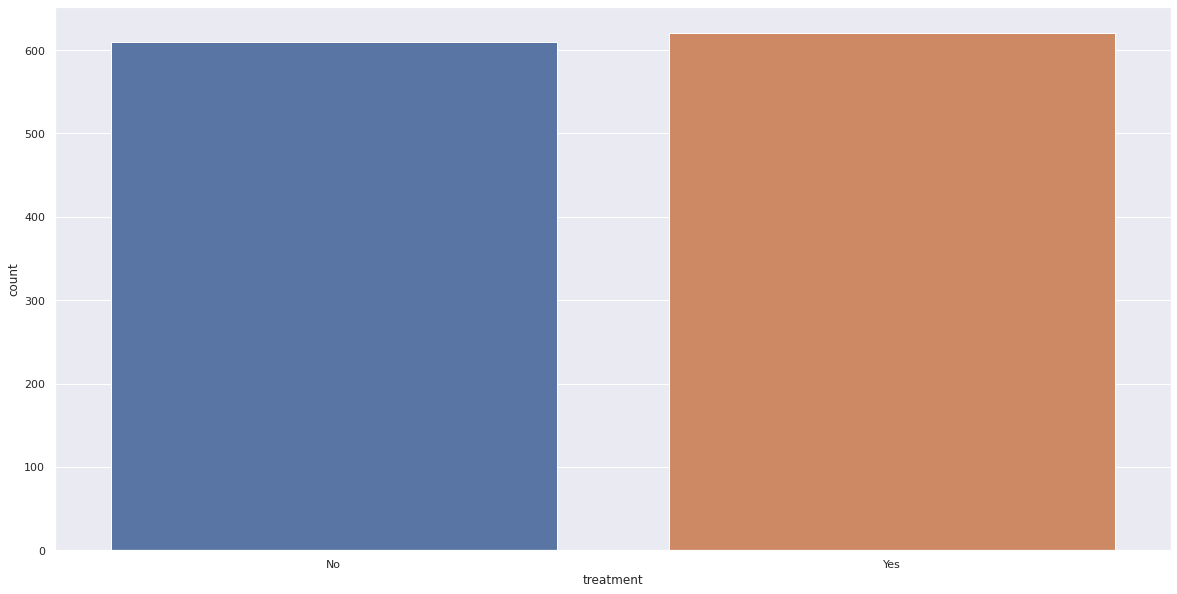

In [29]:
# number of treatments

sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="darkgrid")
sns.countplot(x='treatment',data=mental_data)

In [30]:
mental_data['treatment'].value_counts()

Yes    621
No     610
Name: treatment, dtype: int64

<AxesSubplot:xlabel='treatment', ylabel='count'>

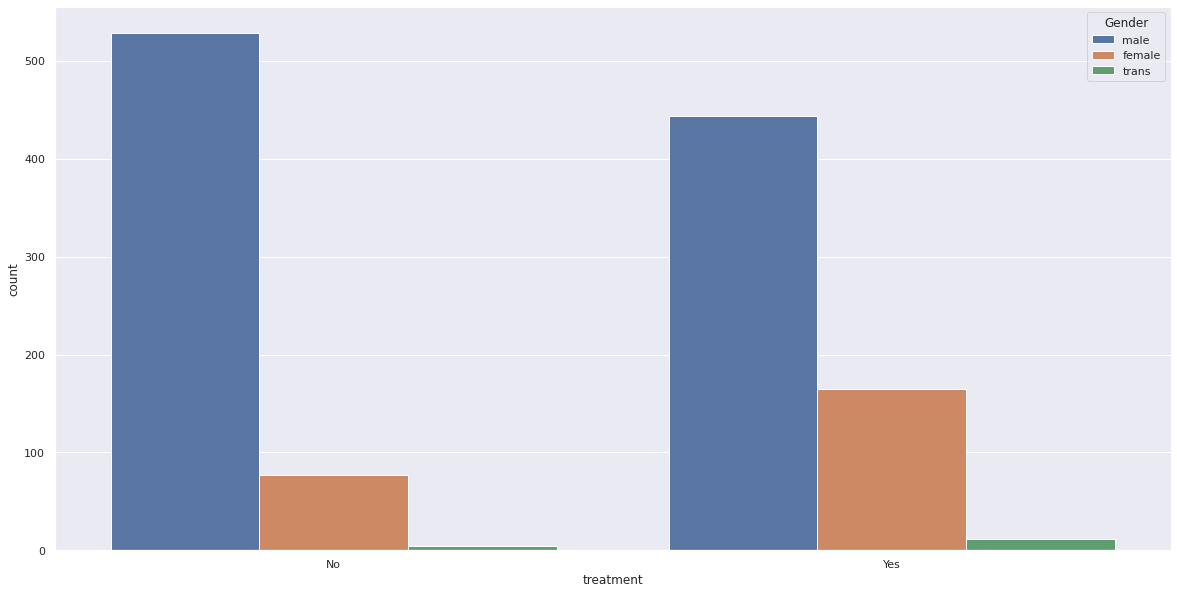

In [31]:
sns.countplot(x='treatment', hue='Gender', data=mental_data)

<AxesSubplot:xlabel='treatment', ylabel='count'>

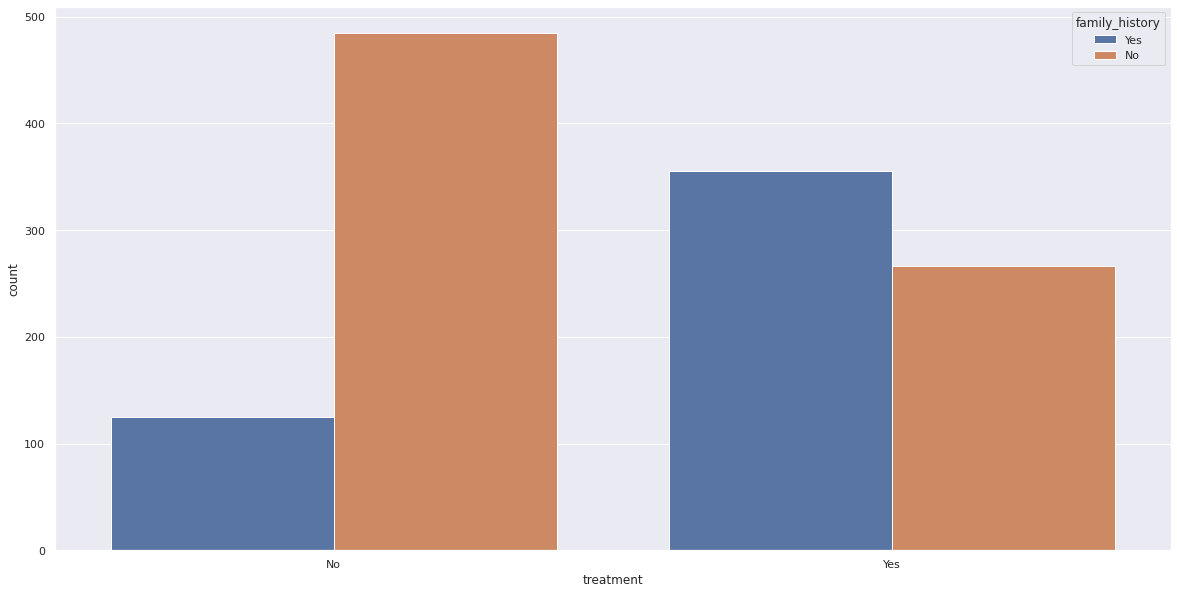

In [32]:
sns.countplot(x='treatment',hue='family_history',data=mental_data)

<AxesSubplot:xlabel='family_history', ylabel='count'>

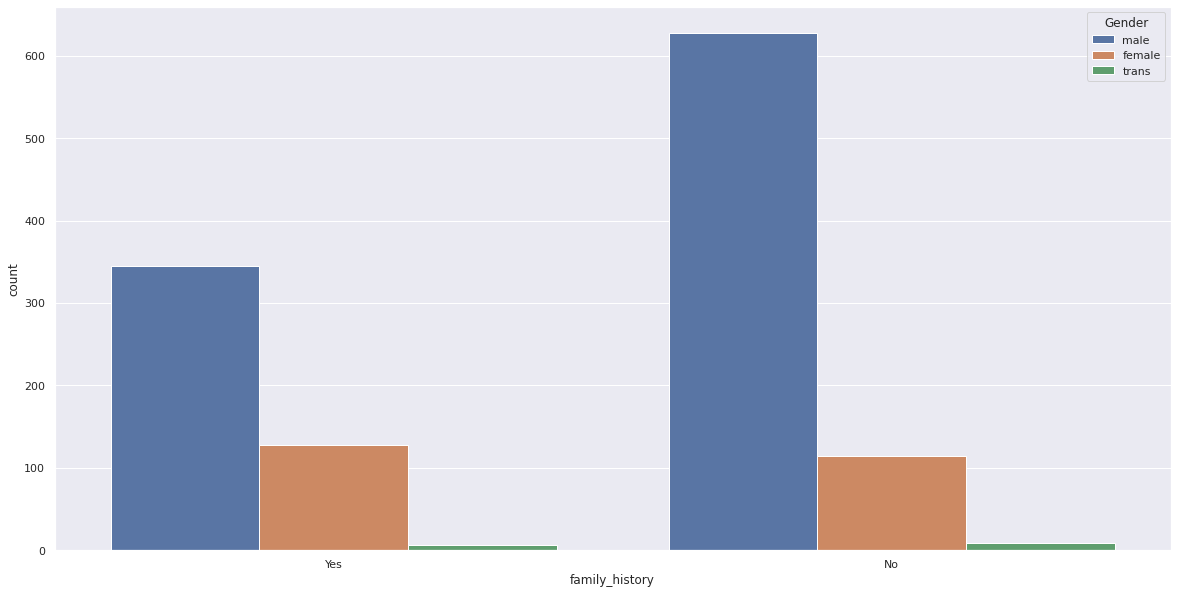

In [33]:
sns.countplot(x='family_history',hue='Gender',data=mental_data)

<AxesSubplot:xlabel='Country', ylabel='count'>

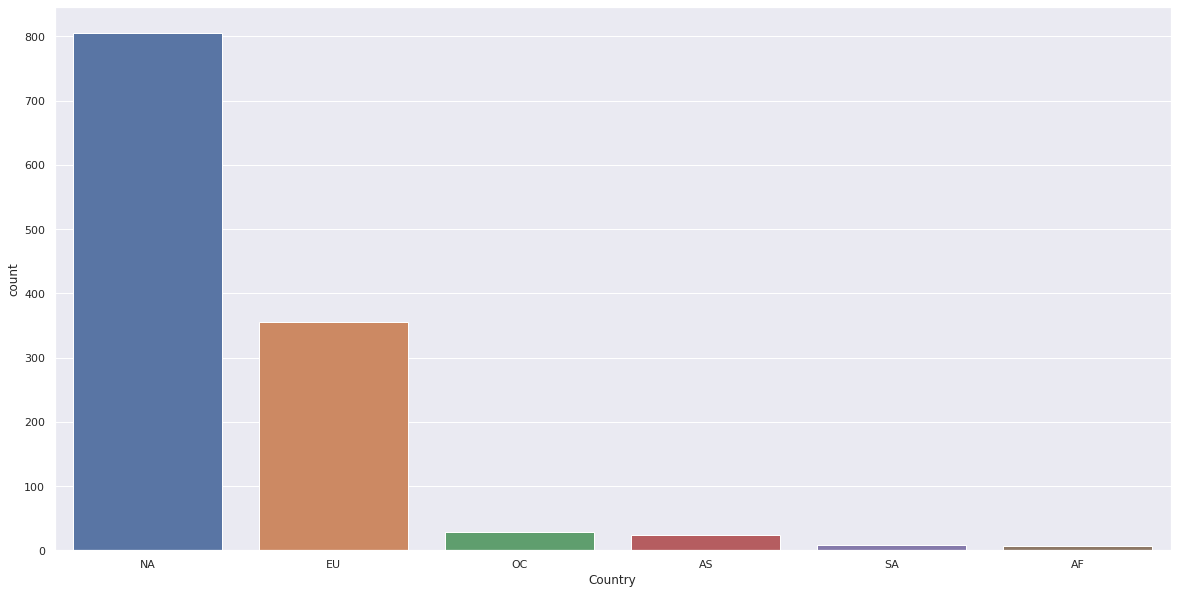

In [34]:
sns.countplot(x='Country',data=mental_data,order=mental_data['Country'].value_counts().index)

<AxesSubplot:xlabel='treatment', ylabel='count'>

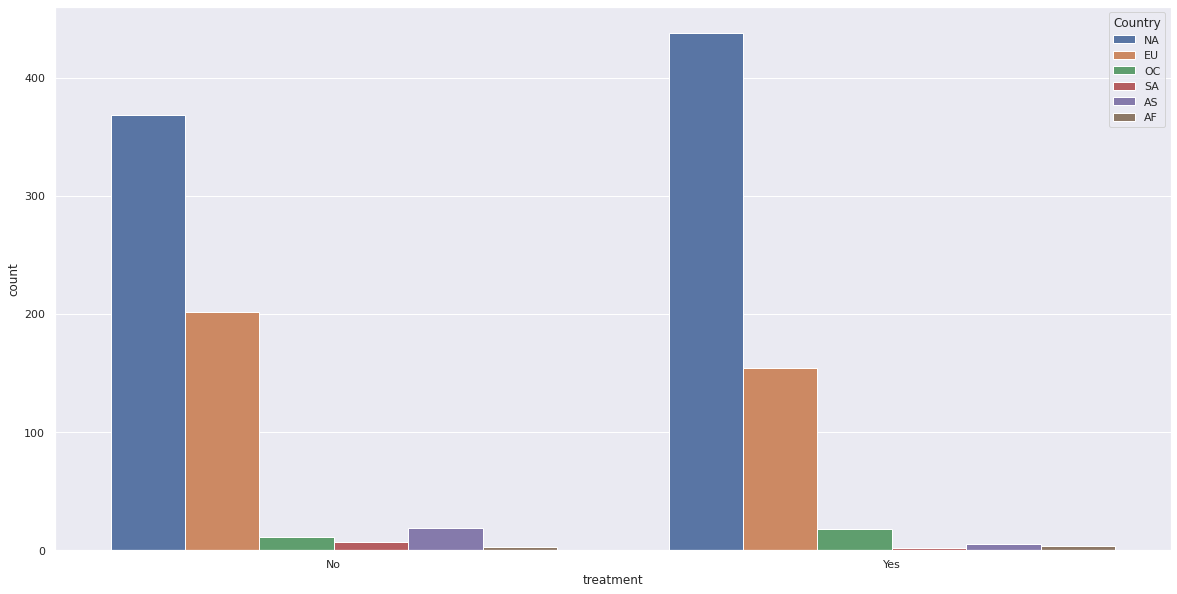

In [35]:
sns.countplot(x='treatment',hue='Country',data=mental_data)

<AxesSubplot:xlabel='no_employees', ylabel='count'>

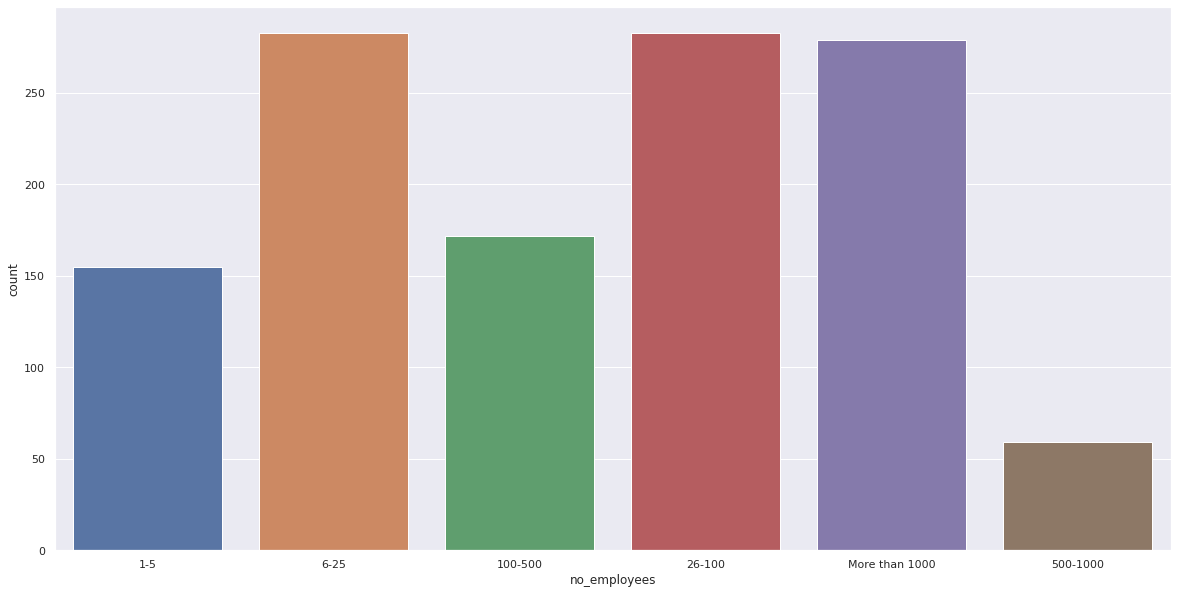

In [36]:
sns.countplot(x='no_employees',data=mental_data)

<AxesSubplot:xlabel='treatment', ylabel='count'>

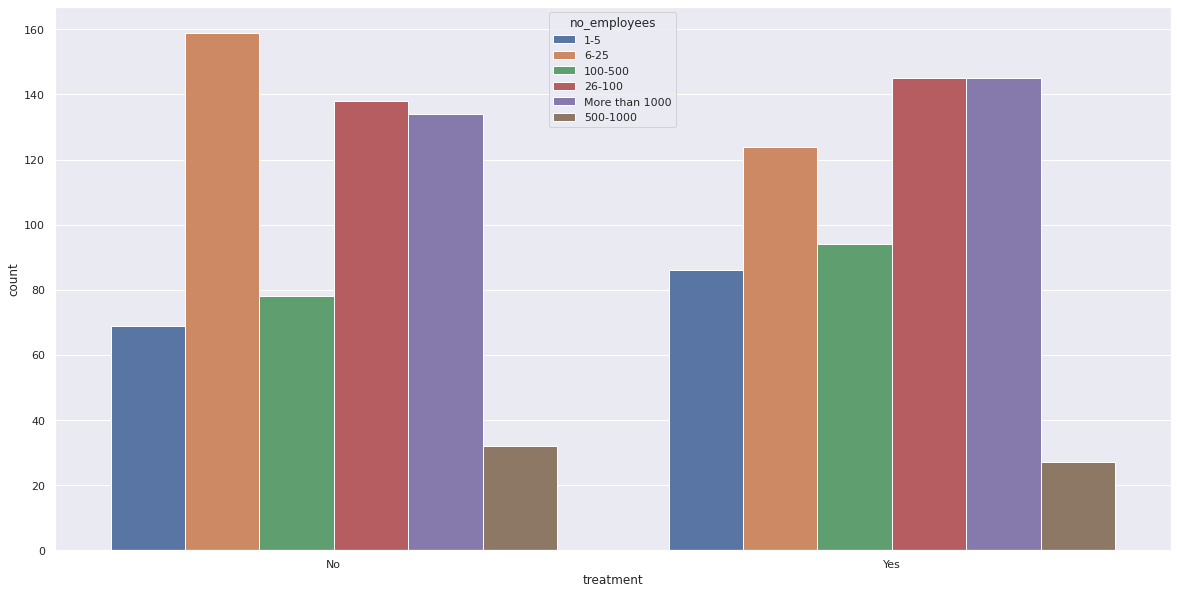

In [37]:
sns.countplot(x='treatment',hue='no_employees',data=mental_data)

<AxesSubplot:xlabel='count', ylabel='Age'>

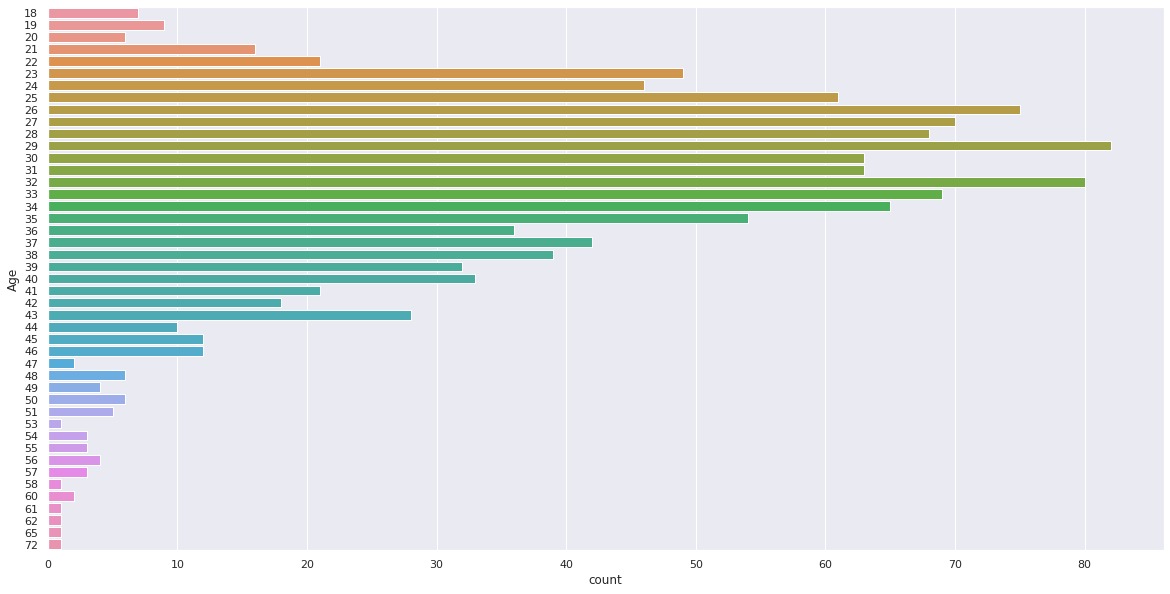

In [38]:
sns.countplot(y='Age',data=mental_data)

<AxesSubplot:ylabel='Age'>

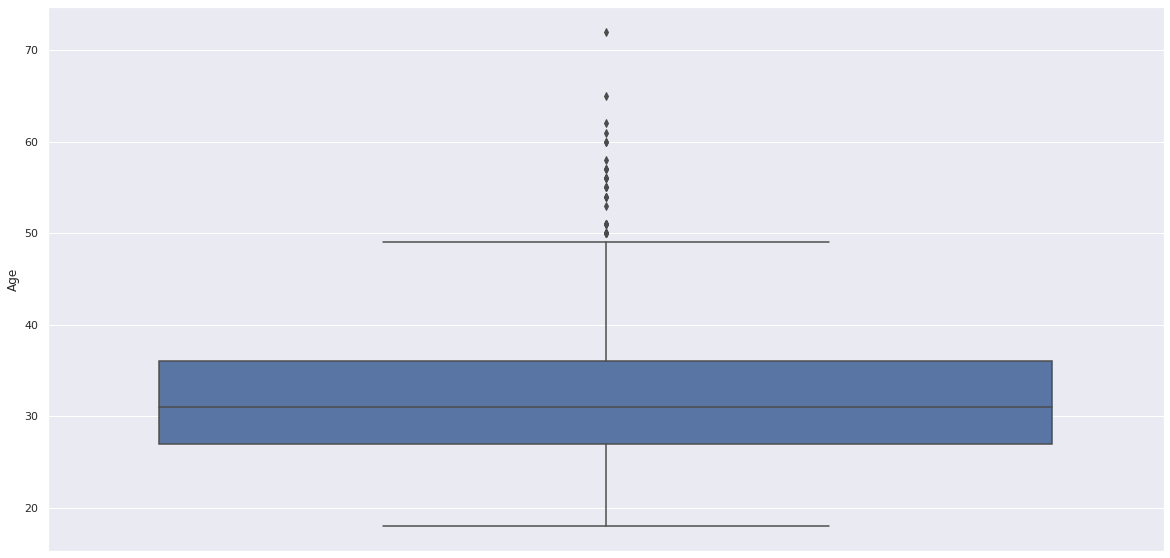

In [39]:
sns.boxplot(y='Age',data=mental_data)